source for this concept learning: https://www.statology.org/remove-outliers-python/

### An outlier is an observation that lies abnormally far away from other values in a dataset. Outliers can be problematic because they can affect the results of an analysis.

## There are two common ways to remove outliers:

### 1. Use the interquartile range.

The interquartile range (IQR) is the difference between the 75th percentile (Q3) and the 25th percentile (Q1) in a dataset. It measures the spread of the middle 50% of values.

You could define an observation to be an outlier if it is 1.5 times the interquartile range greater than the third quartile (Q3) or 1.5 times the interquartile range less than the first quartile (Q1).

Outliers = Observations > Q3 + 1.5*IQR  or observations < Q1 – 1.5*IQR

### 2. Use z-scores.

A z-score tells you how many standard deviations a given value is from the mean. We use the following formula to calculate a z-score:

z = (X – μ) / σ

where:

X is a single raw data value
μ is the population mean
σ is the population standard deviation
You could define an observation to be an outlier if it has a z-score less than -3 or greater than 3.

Outliers = Observations with z-scores > 3 or < -3

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
from sklearn import linear_model

In [5]:
#lets test this outlier removal on the linear regression model and comapre r^2 scores before and after
#removal of outliers
gas_prices =  pd.read_csv('gas_prices.csv')
gas_prices

,Year,Australia,Canada,France,Germany,Italy,Japan,Mexico,South Korea,UK,USA
0,1990,1.84,1.87,3.63,2.65,4.59,3.16,1.00,2.05,2.82,1.16
1,1991,1.96,1.92,3.45,2.90,4.50,3.46,1.30,2.49,3.01,1.14
2,1992,1.89,1.73,3.56,3.27,4.53,3.58,1.50,2.65,3.06,1.13
3,1993,1.73,1.57,3.41,3.07,3.68,4.16,1.56,2.88,2.84,1.11
4,1994,1.84,1.45,3.59,3.52,3.70,4.36,1.48,2.87,2.99,1.11
5,1995,1.95,1.53,4.26,3.96,4.00,4.43,1.11,2.94,3.21,1.15
6,1996,2.12,1.61,4.41,3.94,4.39,3.64,1.25,3.18,3.34,1.23
7,1997,2.05,1.62,4.00,3.53,4.07,3.26,1.47,3.34,3.83,1.23
8,1998,1.63,1.38,3.87,3.34,3.84,2.82,1.49,3.04,4.06,1.06
9,1999,1.72,1.52,3.85,3.42,3.87,3.27,1.79,3.80,4.29,1.17


In [3]:
L_reg = linear_model.LinearRegression()
L_reg

LinearRegression()

In [15]:
L_reg.fit(gas_prices[['Year']].to_numpy(),gas_prices.Canada)
print(L_reg.coef_,L_reg.intercept_)
print(L_reg.predict([[2016],[2017],[2018]]))
print('r^2 score or coeeficient of determination: ',L_reg.score(gas_prices[['Year']].to_numpy(),gas_prices.Canada))

[0.10392982] -205.6688771929825
[3.85364912 3.95757895 4.06150877]
r^2 score or coeeficient of determination:  0.552783941913054


25 percentile for Canada column:
Canada    1.59
Name: 0.25, dtype: float64 

 75 percentile for Canada column :
 Canada    2.18
Name: 0.75, dtype: float64

IQR for all columns: 
 Canada    0.59
dtype: float64

 after removing of outliers using IQR method in canada column: 
 0     1.87
1     1.92
2     1.73
3     1.57
4     1.45
5     1.53
6     1.61
7     1.62
8     1.38
9     1.52
10    1.86
11    1.72
12    1.69
13    1.99
14    2.37
15    2.89
Name: Canada, dtype: float64


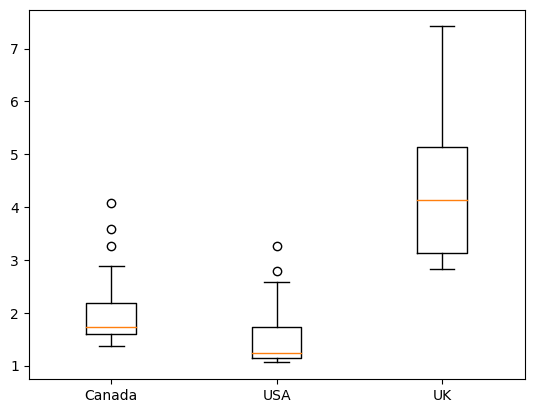

In [19]:
# IQR method
Q1 = gas_prices.quantile(q=.25)[['Canada']]
Q3 = gas_prices.quantile(q= .75)[['Canada']]
print(f'25 percentile for Canada column:\n{Q1} \n\n 75 percentile for Canada column :\n {Q3}')
IQR = gas_prices.apply(stats.iqr)[['Canada']]
print()
print('IQR for all columns: \n',IQR)

#condition for outlier cleaning using IQR method
Iqr_method_c = gas_prices['Canada'].loc[~(((gas_prices[['Canada']] < Q1-(1.5*IQR)) | 
    (gas_prices[['Canada']] > Q3+(1.5*IQR)))).all(axis='columns')]

print('\n after removing of outliers using IQR method in canada column: \n',Iqr_method_c)


plt.boxplot(gas_prices[['Canada','USA','UK']],labels=['Canada','USA','UK'])
plt.show()


In [20]:
L_reg.fit(gas_prices[['Year']][:16].to_numpy(),Iqr_method_c)
print(L_reg.coef_,L_reg.intercept_)
print('after outlier removal r^2: ',L_reg.score(gas_prices[['Year']][:16].to_numpy(),Iqr_method_c))

[0.04135294] -80.8075
after outlier removal r^2:  0.26835703542008504


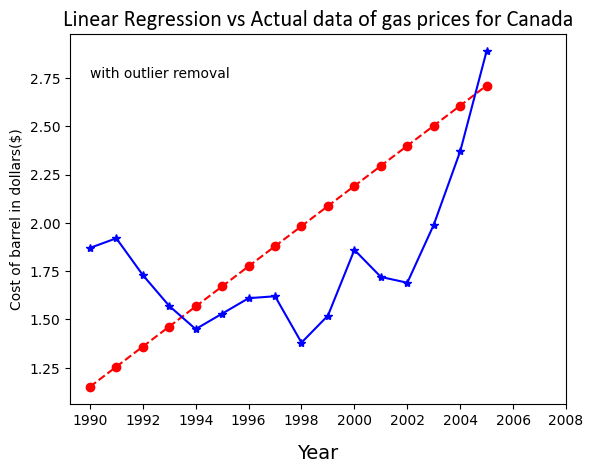

In [17]:
plt.plot(gas_prices.Year[:16],L_reg.predict(gas_prices[['Year']][:16].values),'o--r')
plt.plot(gas_prices.Year[:16],gas_prices.Canada[:16],'*-b')
plt.title('Linear Regression vs Actual data of gas prices for Canada',fontdict=dict(size=16,family='calibri'))
plt.xlabel('Year',labelpad=12,fontsize=14)
plt.ylabel('Cost of barrel in dollars($)')
plt.xticks(ticks=gas_prices.Year[::2])
plt.text(x=1990,y=2.75,s='with outlier removal')
plt.show()

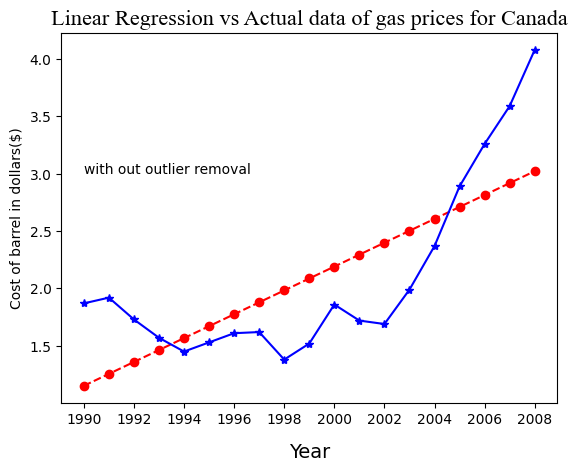

In [14]:
L_reg.fit(gas_prices[['Year']].to_numpy(),gas_prices.Canada)
plt.plot(gas_prices.Year,L_reg.predict(gas_prices[['Year']].values),'o--r')
plt.plot(gas_prices.Year,gas_prices.Canada,'*-b')
plt.title('Linear Regression vs Actual data of gas prices for Canada',fontdict=dict(size=16,family='times new roman'))
plt.xlabel('Year',labelpad=12,fontsize=14)
plt.ylabel('Cost of barrel in dollars($)')
plt.xticks(ticks=gas_prices.Year[::2])
plt.text(x=1990,y=3,s='with out outlier removal')
plt.show()